# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [109]:
# stundent details example: John S. 9812
#                       student details 1: Lidor K. 6757 
# (if exists)           student details 2: Amit S. 8979
# (if exists)           student details 3: Michael Y. 2854
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: Achieve visualization ideas, description and comments. General and simple help with python and libraries.
    The following prompts are some joint examples of the prompts we used.
    
- Propmpt1: Give me 4 types of visualization for a project on Breast Cancer
    
- Propmpt2: Give me a good description for my assignment, make it short so I could fill in the details.
    
- Propmpt3: Comment this code for better readibality and explanation for later reads.

- Prompt4: I couldn't install sklearn on my machine, it says it's deprecated.

- Prompt5: What interesting learning algorithms and hyperparameters could I use in training for this data?

  
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
#### Problem Description and Task Objective

In this assignment, we will address an important medical issue from the field of computerized diagnosis: classifying breast tumors as either malignant (cancerous) or benign (non-dangerous). The goal is to build an intelligent system that can predict the type of tumor based on various measurements taken from each sample.

The data file includes the results of tests conducted on hundreds of tumor samples. For each sample, various quantitative features were measured – such as size, shape, texture, symmetry, and the uniformity of the cells. At the end of each row appears the correct label – whether the tumor is malignant or benign.

By analyzing and exploring the supplied data for this assignment, we will try to understand which features have the most influence on tumor classification. Then, we will build a machine learning model that can “learn” from the existing examples and use that knowledge to make accurate and automated predictions in the future.

With this exercise we have become familiar with the workflow involved in handling a real-world dataset: data cleaning, feature analysis, model building, performance evaluation – all within the context of a realistic problem with significant implications.
    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [110]:
#imports for all of the cells
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [111]:
#loading train dataset + 5 first rows

df_train = pd.read_csv('cancer_train.csv')
df_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


In [112]:
#loading test dataset + 5 first rows

df_test = pd.read_csv('cancer_test.csv')
df_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1


### Visualizations


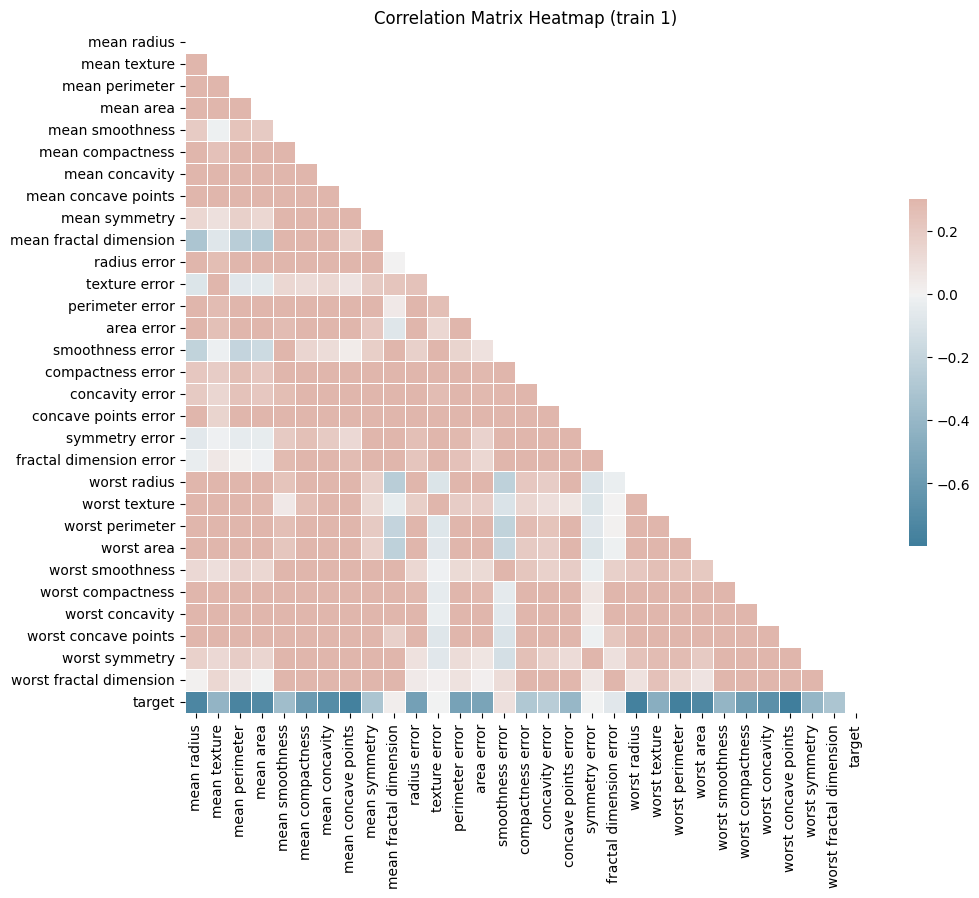

In [113]:
# using a heatmap highlighting, the relationships between different features
# darker and red indicate stronger positive correlations.
# light or blue indicate stronger negative correlations.

corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap (train 1)')
plt.show()

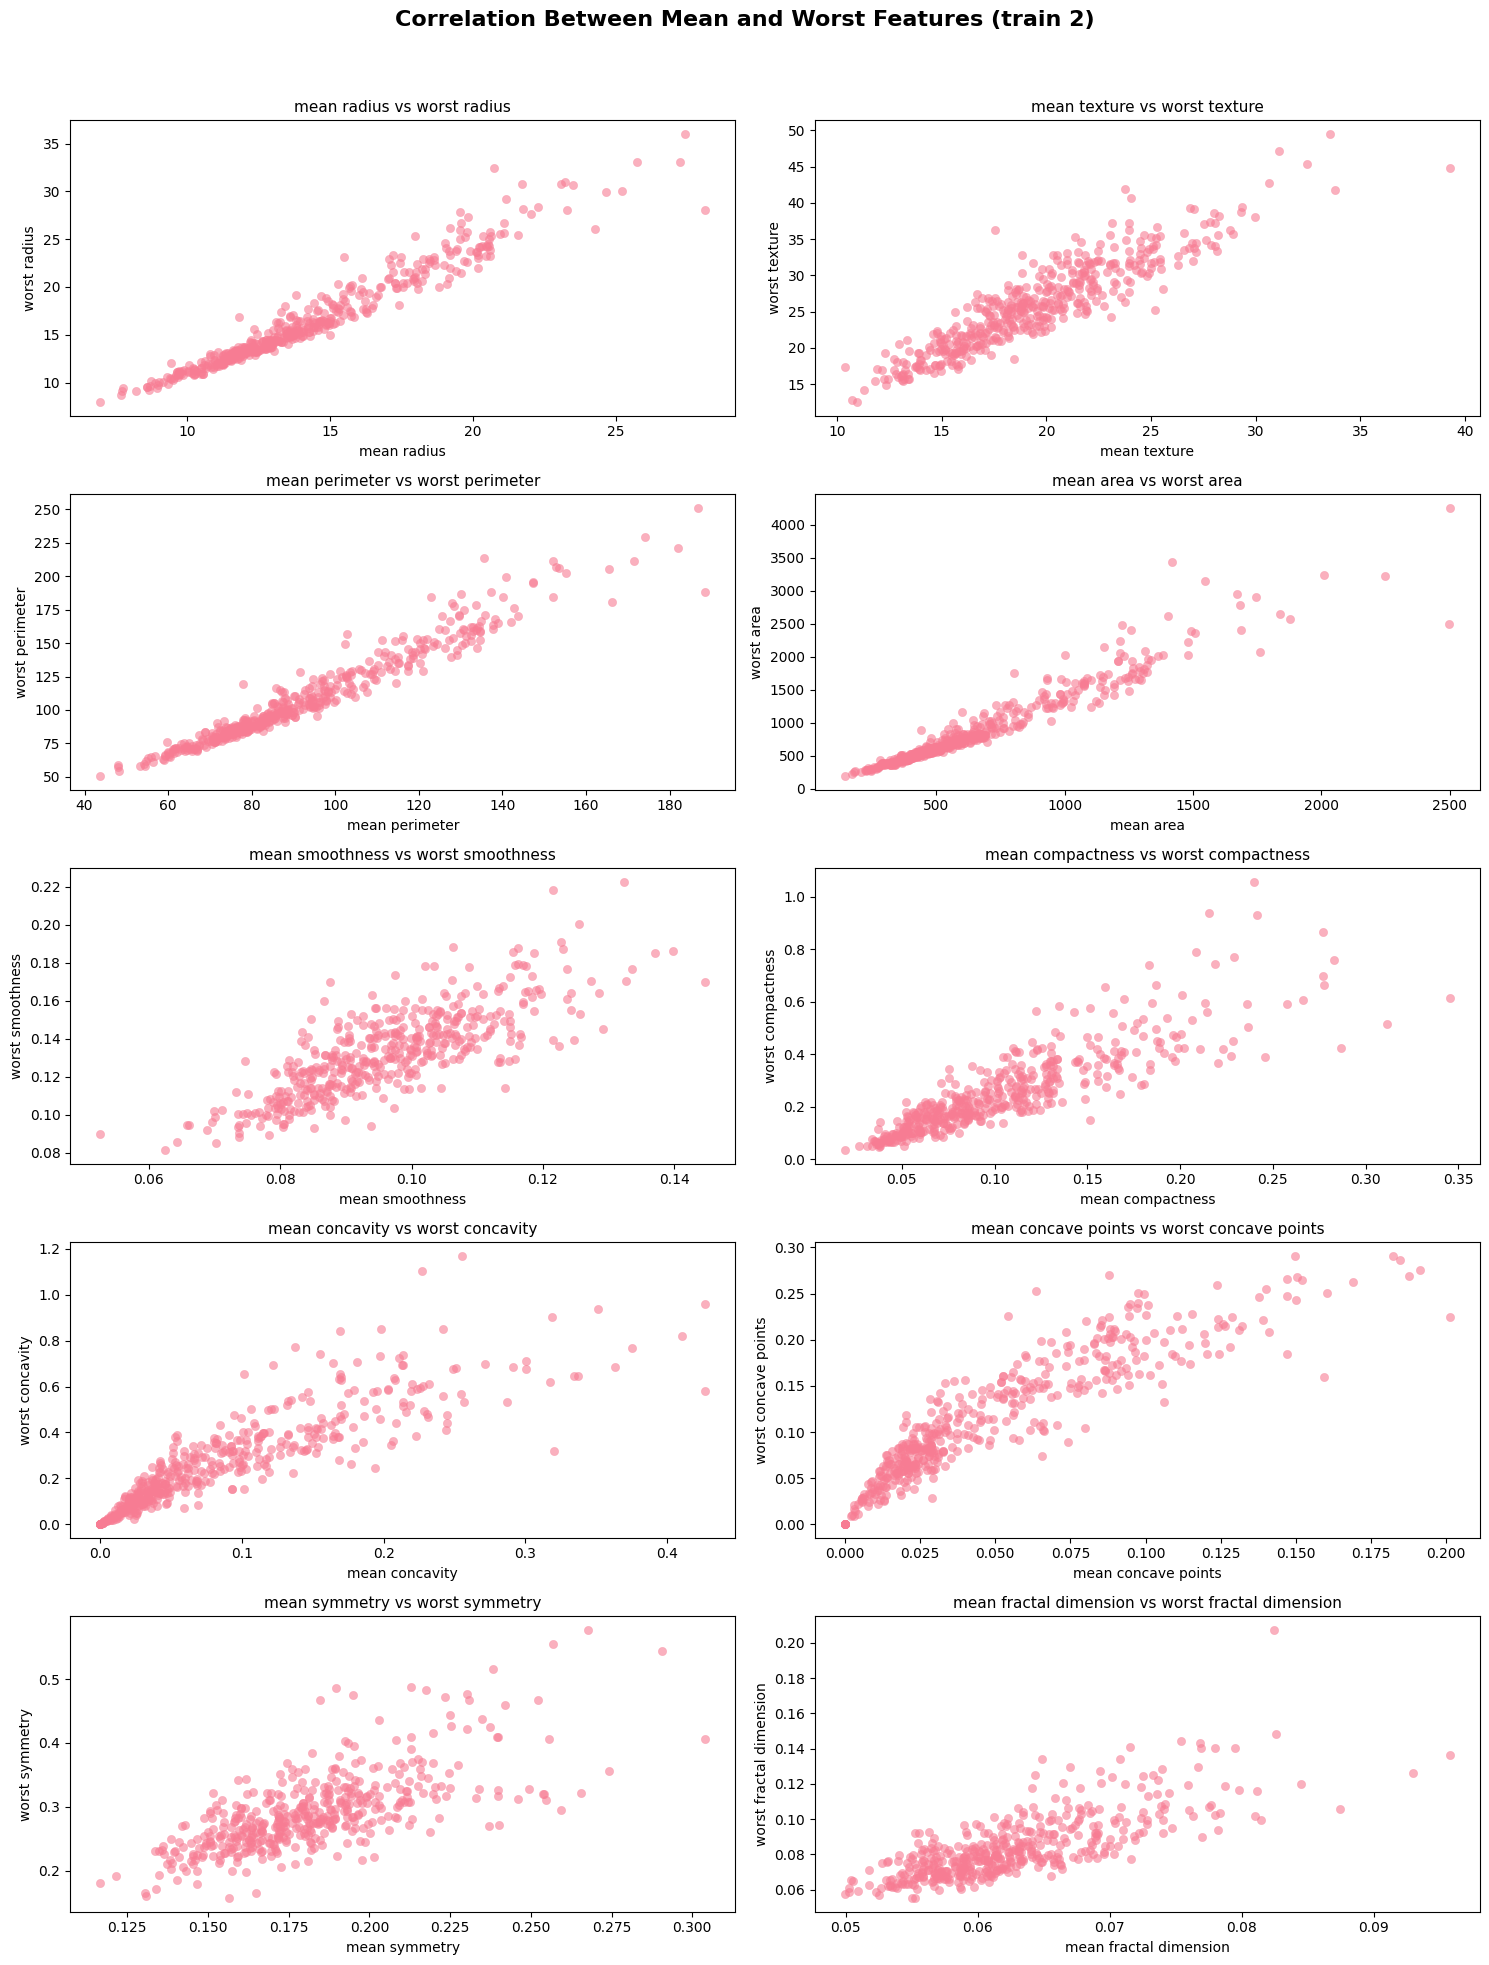

In [114]:
# visualizations Scatter Plot Matrix for Mean vs. Worst
#scatter plots to visualize the correlation between each pair helping to understand their relationships

pink_color = '#F77C93'

# Feature pairs for scatter plots
feature_pairs = [
    ('mean radius', 'worst radius'),
    ('mean texture', 'worst texture'),
    ('mean perimeter', 'worst perimeter'),
    ('mean area', 'worst area'),
    ('mean smoothness', 'worst smoothness'),
    ('mean compactness', 'worst compactness'),
    ('mean concavity', 'worst concavity'),
    ('mean concave points', 'worst concave points'),
    ('mean symmetry', 'worst symmetry'),
    ('mean fractal dimension', 'worst fractal dimension')
]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.suptitle('Correlation Between Mean and Worst Features (train 2)', fontsize=16, fontweight='bold')

# Plot each pair with pink hue
for (mean_feature, worst_feature), ax in zip(feature_pairs, axes.flatten()):
    ax.scatter(df_train[mean_feature], df_train[worst_feature], alpha=0.6, color=pink_color, linewidth=0.3)
    ax.set_xlabel(mean_feature, fontsize=10)
    ax.set_ylabel(worst_feature, fontsize=10)
    ax.set_title(f'{mean_feature} vs {worst_feature}', fontsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

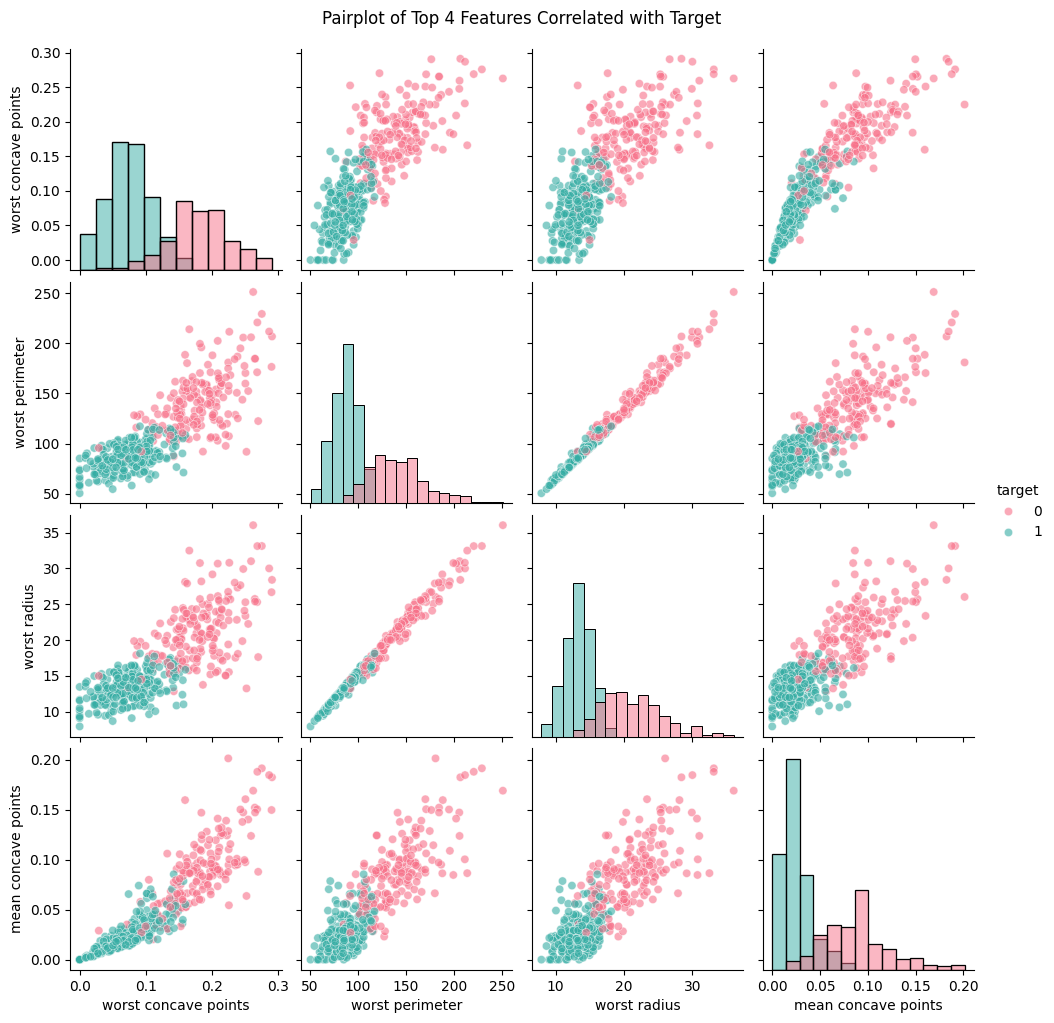

In [115]:
#Pairplot for the 4 top features closest to target
#Blue color is Malignant tumor, pink is Benign

# calculate correlation with target and choose top 4
corr = df_train.corr()['target'].drop('target').abs().sort_values(ascending=False)
top_features = corr.head(4).index.tolist()

#check that features are numeric
top_features_cleaned = df_train[top_features + ['target']].apply(pd.to_numeric, errors='coerce').dropna()

sns.pairplot(top_features_cleaned, vars=top_features, hue='target', diag_kind='hist', palette='husl', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Top 4 Features Correlated with Target', y=1.02)
plt.show()

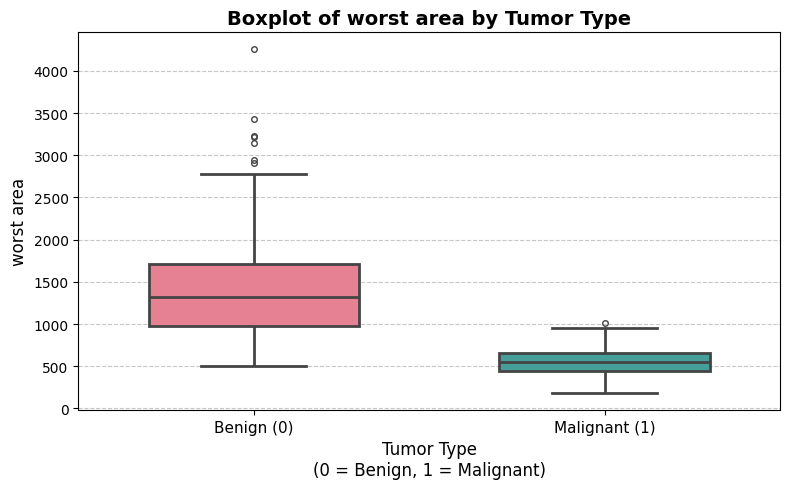

In [116]:
# This boxplot visualizes the distribution of the feature with the highest variance
# this feature provides a clear separation between the two classes, making it
# potentially useful for classification models.


# Identify the feature with the highest variance in the dataset (excluding the target variable).
high_variance_feature = df_train.var().drop('target').sort_values(ascending=False).index[0]

# Set the figure size for better readability of axis labels and box boundaries
plt.figure(figsize=(8, 5))

# Blue: Benign, Red: Malignant
palette = 'husl'

sns.boxplot(
    x='target',
    y=high_variance_feature,
    hue='target',
    data=df_train,
    palette=palette,
    linewidth=2,
    fliersize=4,
    width=0.6,
    legend=False  
)

# Add a descriptive and styled title to the plot
plt.title(f'Boxplot of {high_variance_feature} by Tumor Type', fontsize=14, fontweight='bold')

# Add labels to the plot
plt.xlabel('Tumor Type\n(0 = Benign, 1 = Malignant)', fontsize=12)
plt.ylabel(high_variance_feature, fontsize=12)
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'], fontsize=11)

# Add horizontal grid lines and improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

### Feature Engineering

In [117]:
# Feature Enginnering Feature Scaling -> Standardization 
X_train = df_train.drop(columns=['target'])
y_train = df_train['target']
X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the head of the transformed datasets
print("Head of the scaled training set:")
print(X_train_scaled_df.head())

print("\nHead of the scaled test set:")
print(X_test_scaled_df.head())

Head of the scaled training set:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.301413     -0.193292       -0.277010  -0.367890         1.420887   
1    -1.271942     -0.233227       -1.260732  -1.041995        -0.490928   
2     1.615819      1.028240        1.679991   1.588252         0.854745   
3    -1.470591     -0.874532       -1.371194  -1.162538        -0.116404   
4     1.045082     -0.618480        0.989096   0.882569        -0.490203   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.327833        0.391801             0.589345       1.106432   
1         -0.796395       -0.757427            -0.878776       1.501197   
2          1.455405        1.696282             1.965235       1.540674   
3          0.350125        0.021930            -0.678692      -1.847132   
4          0.329691        0.223958             0.315679      -0.357789   

   mean fractal dimension  ...  worst radius  worst texture

In [118]:
# Feature Enginnering (Feature Scaling) -> Robust Scaling
#The code standardizes the features in the training and test datasets

X_train = df_train.drop(columns=['target'])
y_train = df_train['target']
X_test = df_test.drop(columns=['target'])
y_test = df_test['target']

scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames
X_train_robust = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_robust = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print the head of the transformed datasets
print("Head of the scaled training set:")
print(X_train_robust.head())

print("\nHead of the scaled test set:")
print(X_test_robust.head())

Head of the scaled training set:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    -0.065537     -0.064632       -0.037360  -0.063871         1.102182   
1    -0.857175     -0.095153       -0.812728  -0.701285        -0.299627   
2     1.498305      0.868941        1.505145   1.785798         0.687068   
3    -1.019209     -0.585278       -0.899794  -0.815267        -0.025013   
4     1.032768     -0.389587        0.960583   1.118525        -0.299095   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.442603        0.567257             0.704909       0.983800   
1         -0.494965       -0.324270            -0.320253       1.307806   
2          1.382959        1.579225             1.665670       1.340206   
3          0.461193        0.280326            -0.180538      -1.440353   
4          0.444152        0.437051             0.513813      -0.217968   

   mean fractal dimension  ...  worst radius  worst texture

### HyperParameters


In [119]:
# Random Forest: [n_estimators,max_depth]
# Gradient Boosting Machines: [learning_rate,subsample]
# Support Vector Machines: [C,kernel]

In [120]:
rf = RandomForestClassifier(n_estimators=100)  # Adjustable if needed

# Fit the model to the training data
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [121]:
rf = RandomForestClassifier(max_depth=10)  # Adjustable if needed

# Fit the model to the training data
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [122]:
rf = RandomForestClassifier(max_depth=10)   # Adjustable if needed

# Fit the model to the training data
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9649122807017544


In [123]:
gbm = GradientBoostingClassifier(learning_rate=0.1)   # Adjustable if needed

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Evaluate the model
accuracy = gbm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [124]:
gbm = GradientBoostingClassifier(subsample=0.8, random_state=42)   # Adjustable if needed
# Fit the model to the training data
gbm.fit(X_train, y_train)

# Evaluate the model
accuracy = gbm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.956140350877193


In [125]:
svm = SVC(C=1.0, random_state=42)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Evaluate the model
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9122807017543859


In [126]:
svm = SVC(kernel='rbf', random_state=42)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Evaluate the model
accuracy = svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9122807017543859


### 5-Fold Cross

In [127]:
# This code initializes a Random Forest classifier with 100 estimators,
# and performs 5-fold cross-validation to evaluate its performance

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Calculate the average cross-validation score
avg_cv_score = cv_scores.mean()
print("Average Cross-Validation Score:", avg_cv_score)

# Train the classifier on the full training data
rf_classifier.fit(X_train, y_train)

# Evaluate the classifier on the test data
y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.95604396 0.98901099 0.93406593 0.96703297 0.97802198]
Average Cross-Validation Score: 0.964835164835165
Test Accuracy: 0.9649122807017544


In [128]:
# code splits the training data into training and validation sets 
# using a 80-20 split ratio.

X_train_main, X_validation_main, Y_train_main, Y_validation_main = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)
X_validation_main


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
302,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.2341,0.06963,...,10.01,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
39,13.270,14.76,84.74,551.7,0.07355,0.05055,0.032610,0.026480,0.1386,0.05318,...,16.36,22.35,104.50,830.6,0.10060,0.12380,0.13500,0.10010,0.2027,0.06206
393,10.570,18.32,66.82,340.9,0.08142,0.04462,0.019930,0.011110,0.2372,0.05768,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
411,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,0.06782,...,30.00,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
155,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.11260,0.17370,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,23.090,19.83,152.10,1682.0,0.09342,0.12750,0.167600,0.100300,0.1505,0.05484,...,30.79,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277
137,9.742,19.12,61.93,289.7,0.10750,0.08333,0.008934,0.019670,0.2538,0.07029,...,11.21,23.17,71.79,380.9,0.13980,0.13520,0.02085,0.04589,0.3196,0.08009
93,13.740,17.91,88.12,585.0,0.07944,0.06376,0.028810,0.013290,0.1473,0.05580,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
57,14.870,16.67,98.64,682.5,0.11620,0.16490,0.169000,0.089230,0.2157,0.06768,...,18.81,27.37,127.10,1095.0,0.18780,0.44800,0.47040,0.20270,0.3585,0.10650


In [129]:
# the table is too big, therefore we used gradient and random forest

In [130]:
#performs a grid search for hyperparameters of a Gradient Boosting classifier 
#It then evaluates the classifier's performance using
#5-fold cross-validation with the F1 score as the evaluation metric

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Define cross-validation strategy (5-fold cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search for Gradient Boosting
gb_grid_search = GridSearchCV(gb_classifier, gb_param_grid, scoring=f1_scorer, cv=cv)
gb_grid_search.fit(X_validation_main, Y_validation_main)

# Get results as DataFrame
gradient_boosting_results_df = pd.DataFrame(gb_grid_search.cv_results_)

# Select relevant columns
relevant_columns = ['param_n_estimators', 'param_learning_rate', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'std_test_score']
gradient_boosting_results_df = gradient_boosting_results_df[relevant_columns]

# Rename columns for clarity
gradient_boosting_results_df = gradient_boosting_results_df.rename(columns={'param_n_estimators': 'n_estimators',
                                        'param_learning_rate': 'learning_rate',
                                        'param_max_depth': 'max_depth',
                                        'param_min_samples_split': 'min_samples_split',
                                        'mean_test_score': 'Mean F1 Score',
                                        'std_test_score': 'Standard Deviation F1 Score'})

# Sort DataFrame by mean F1 score
gradient_boosting_results_df = gradient_boosting_results_df.sort_values(by='Mean F1 Score', ascending=False)

# Reset index for clarity
gradient_boosting_results_df = gradient_boosting_results_df.reset_index(drop=True)

print("Gradient Boosting Grid Search Results:")
gradient_boosting_results_df

Gradient Boosting Grid Search Results:


,n_estimators,learning_rate,max_depth,min_samples_split,Mean F1 Score,Standard Deviation F1 Score
0,100,0.01,5,5,0.899127,0.102368
1,200,0.01,3,2,0.887981,0.093421
2,100,0.01,5,2,0.887981,0.093421
3,200,0.01,5,2,0.887981,0.093421
4,200,0.01,5,5,0.887981,0.093421
5,100,0.10,5,2,0.887981,0.093421
6,200,0.10,5,2,0.887981,0.093421
7,100,0.10,5,5,0.887981,0.093421
8,200,0.10,5,5,0.887981,0.093421
9,200,0.01,3,5,0.877455,0.082538


In [131]:
#performs a grid search for hyperparameters of a Random Forest classifier 
#It then evaluates the classifier's performance using
#5-fold cross-validation with the F1 score as the evaluation metric

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define F1 scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Define cross-validation strategy (5-fold cross-validation)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, scoring=f1_scorer, cv=cv)
rf_grid_search.fit(X_validation_main, Y_validation_main)

# Get results as DataFrame
random_forest_results_df = pd.DataFrame(rf_grid_search.cv_results_)

# Select relevant columns
relevant_columns = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score']
random_forest_results_df = random_forest_results_df[relevant_columns]

# Rename columns for clarity
random_forest_results_df = random_forest_results_df.rename(columns={'param_n_estimators': 'n_estimators',
                                        'param_max_depth': 'max_depth',
                                        'param_min_samples_split': 'min_samples_split',
                                        'param_min_samples_leaf': 'min_samples_leaf',
                                        'mean_test_score': 'Mean F1 Score',
                                        'std_test_score': 'Standard Deviation F1 Score'})

# Sort DataFrame by mean F1 score
random_forest_results_df = random_forest_results_df.sort_values(by='Mean F1 Score', ascending=False)

# Reset index for clarity
random_forest_results_df = random_forest_results_df.reset_index(drop=True)

print("Random Forest Grid Search Results:")
random_forest_results_df

Random Forest Grid Search Results:


,n_estimators,max_depth,min_samples_split,min_samples_leaf,Mean F1 Score,Standard Deviation F1 Score
0,100,None,2,1,0.933463,0.054690
1,100,10,2,1,0.933463,0.054690
2,100,20,2,1,0.933463,0.054690
3,300,None,2,1,0.922878,0.056079
4,300,20,2,1,0.922878,0.056079
...,...,...,...,...,...,...
76,300,10,2,2,0.889302,0.034896
77,300,None,5,2,0.889302,0.034896
78,300,20,5,2,0.889302,0.034896
79,300,20,2,2,0.889302,0.034896


In [132]:
# merges the results of grid searches for Random Forest and Gradient Boosting classifiers into a single DataFrame

combined_results_df = pd.concat([random_forest_results_df, gradient_boosting_results_df])

# Add a new column to specify the classifier type
combined_results_df['Classifier'] = ['Random Forest'] * len(random_forest_results_df) + \
                                     ['Gradient Boosting'] * len(gradient_boosting_results_df)

# Reset index for clarity
combined_results_df = combined_results_df.reset_index(drop=True)

print("Combined Grid Search Results:")
combined_results_df

Combined Grid Search Results:


,n_estimators,max_depth,min_samples_split,min_samples_leaf,Mean F1 Score,Standard Deviation F1 Score,learning_rate,Classifier
0,100,None,2,1.0,0.933463,0.054690,NaN,Random Forest
1,100,10,2,1.0,0.933463,0.054690,NaN,Random Forest
2,100,20,2,1.0,0.933463,0.054690,NaN,Random Forest
3,300,None,2,1.0,0.922878,0.056079,NaN,Random Forest
4,300,20,2,1.0,0.922878,0.056079,NaN,Random Forest
...,...,...,...,...,...,...,...,...
92,100,3,5,NaN,0.876627,0.089247,0.01,Gradient Boosting
93,100,3,2,NaN,0.876627,0.089247,0.10,Gradient Boosting
94,200,3,2,NaN,0.876627,0.089247,0.10,Gradient Boosting
95,100,3,5,NaN,0.876627,0.089247,0.10,Gradient Boosting


In [133]:
# Best hyperparameter results

best_hyperparameters = combined_results_df.iloc[0]
print("Best Hyperparameters:")
print(best_hyperparameters)

Best Hyperparameters:
n_estimators                             100
max_depth                               None
min_samples_split                          2
min_samples_leaf                         1.0
Mean F1 Score                       0.933463
Standard Deviation F1 Score          0.05469
learning_rate                            NaN
Classifier                     Random Forest
Name: 0, dtype: object


In [134]:
# identifies the row with the highest mean F1 score in the Random Forest results DataFrame

idx_max_f1_score_rf = random_forest_results_df['Mean F1 Score'].idxmax()

# Get the top Mean F1 Score and Classifier
top_f1_score_rf = random_forest_results_df.loc[idx_max_f1_score_rf, 'Mean F1 Score']
top_classifier_rf = "Random Forest"

print("Top Highest Mean F1 Score with Classifier = 'Random Forest':", top_f1_score_rf)

# Get the hyperparameters used to achieve the top Mean F1 Score with Classifier = 'Random Forest'
top_hyperparameters_rf = {
    'n_estimators': random_forest_results_df.loc[idx_max_f1_score_rf, 'n_estimators'],
    'max_depth': random_forest_results_df.loc[idx_max_f1_score_rf, 'max_depth'],
    'min_samples_split': random_forest_results_df.loc[idx_max_f1_score_rf, 'min_samples_split'],
    'min_samples_leaf': random_forest_results_df.loc[idx_max_f1_score_rf, 'min_samples_leaf']
}

print("Hyperparameters used to achieve the top Mean F1 Score with Classifier = 'Random Forest':")
top_hyperparameters_rf

Top Highest Mean F1 Score with Classifier = 'Random Forest': 0.9334630694383016
Hyperparameters used to achieve the top Mean F1 Score with Classifier = 'Random Forest':


{'n_estimators': np.int64(100),
 'max_depth': None,
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(1)}

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [135]:
# trains a Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)  

# Predict and calculate accuracy for Random Forest
rf_predictions = rf_classifier.predict(X_test)  
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9649122807017544


## Part 5 - Apply on test and show model performance estimation

In [136]:
# evaluates the performance of the trained Random Forest classifier
# on the test data by predicting labels and calculating accuracy


# Use the trained Random Forest classifier to predict labels for the test data
rf_predictions = rf_classifier.predict(X_test)  

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9649122807017544
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.99      0.96      0.97        80

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [137]:
# the actual and predicted values from the Random Forest model predictions on the test data

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

# Print the first 5 rows
print("First 5 rows:")
print(results_df.head(5))

First 5 rows:
   Actual  Predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       1          1
